In [ ]:
!python --version

Python 3.8.10


In [ ]:
!pip install swig
!pip install Boost
!pip install xylib-py
# !git clone https://github.com/wojdyr/xylib.git
# !pip install git+https://github.com/wojdyr/xylib.git
# !python setup.py install

!pip install swig Boost 
export PATH=$PATH:
!pip install xylib-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 3.8 MB/s eta 0:00:00
  Created wheel for Boost: filename=boost-0.1-py3-none-any.whl size=12460 sha256=f8894389f58efb5293495ca84d1988b0e9979dedcdaaa46ea8a5722a902aba0e
  Stored in directory: /root/.cache/pip/wheels/cf/0e/9b/591d2c638d78dea35769db51d8d6fc221cbb1b4c08af979b7c
Successfully built Boost
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xylib-py: filename=xylib_py-1.6.1-cp38-cp38-linux_x86_64.whl size=3588581 sha256=c37

In [1]:
import xylib as xy

import glob, os 

#data management
import numpy as np, pandas as pd

#plotting
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'xylib'

xylib is a library for reading files that contain x-y data from powder diffraction, spectroscopy or other experimental methods.
It is recommended to set LC_NUMERIC="C" (or other locale with the same numeric format) before reading files.  Usually, we first call load_file() to read file from disk. It stores all data from the file in class DataSet.
  DataSet contains a list of Blocks, each Blocks contains a list of Columns,
  and each Column contains a list of values.
 
  It may sound complex, but IMO it can't be made simpler.
  It's analogical to a spreadsheet. One OOCalc or Excel file (which
  corresponds to xylib::DataSet) contains a number of sheets (Blocks),
  but usually only one is used. Each sheet can be viewed as a list of columns.
 
  In xylib all columns in one block must have equal length.
  Several filetypes always contain only one Block with two Columns.
  In this case we can take coordinates of the 15th point as:
     double x = get_block(0)->get_column(1)->get_value(14);
     double y = get_block(0)->get_column(2)->get_value(14);
  Note that blocks and points are numbered from 0, but columns are numbered
  from 1, because the column 0 returns index of point.
  All values are stored as floating-point numbers, even if they are integers
  in the file.
  DataSet and Block contain also MetaData, which is a string to string map.
 
  Note that C++ API uses std::string and exceptions, so it is recommended
  to compile the library and programs that use it with the same compiler.
 
  C++ API is defined in xylib namespace, C API use prefix xylib.
 /

Read file and get block and the two columns

In [ ]:
filename = 'JO2-98-MoCO3-100p.raw'
file1= xy.load_file('./' + filename)
# file2= xy.load_file('./GTMV1-w_4-50_02s.raw')

print(file1.get_block_count())
block = file1.get_block(0)
print(block.get_column_count())
col1 = block.get_column(1)
col2 = block.get_column(2)

1
2


Get metadata from which u can obtain the x axis (seems that col1 is not accessible

In [ ]:
print(block.get_name())
meta = block.meta
type(meta)

keys = []

#get the keys name
for i in range(0,12):
  keys.append(meta.get_key(i))

#loop over keys to get their values
for key in keys:
  print(key ,meta.get(key))
startth = meta.get('START_2THETA')
stepsize = meta.get('STEP_SIZE')
nstep = meta.get('STEPS')

print(type(startth), type(stepsize), type(nstep))
print(float(startth), float(stepsize), float(nstep))

startth = float(startth)
stepsize = float(stepsize)
nstep = float(nstep)

# creat np array for x
npx = np.arange(startth,startth+stepsize*nstep,stepsize)
np.shape(npx)


AMPLIFIER_GAIN 9999
DISCRIMINATOR_1_LOWER_LEVEL 9999
GENERATOR_CURRENT 40
GENERATOR_VOLTAGE 40
HIGH_VOLTAGE 9999
ROTATION_SPEED [rpm] 15
START_2THETA 2
START_THETA 1
STEPS 1442
STEP_SIZE 0.0194336
TIME_PER_STEP 82.8785
USED_LAMBDA 1.5406
<class 'str'> <class 'str'> <class 'str'>
2.0 0.0194336 1442.0


(1442,)

Extract y values

In [ ]:
valy = []

for index in range(1, col2.get_point_count()):
  valy.append(col2.get_value(index))

# create numpy array
npy = np.array(valy)

#build the dataset
dataset = [npx[:-1], npy]

npdataset = np.array(dataset).T
np.shape(npdataset)

(2404, 2)

construct the head of the final file

In [ ]:
tps = meta.get('TIME_PER_STEP')
lam = meta.get('USED_LAMBDA')
head = f"time per step: {tps}\nlambda: {lam}\n2theta Counts"

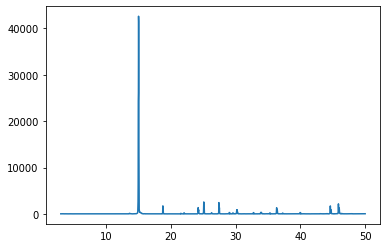

In [ ]:
# plot dataset
plt.plot(dataset[0], dataset[1])

Export and save

In [ ]:
np.savetxt(fname=filename[:-3]+".xy", X=npdataset, header=head)

The following cell is to run the same code on multiple files.

In [ ]:
########################### MODIFY THESE PRMS ###########################
#path parameter
mainDir = './'
#leave empty(with no '' !!) if not used, 
subDirs = []

#fill this list to run the code only for specified folders. 
selected = []    #REMEMBER to put extension. 

#file parameter
ext = '.raw'
#############################################################################

#variable declaration
paths = []
files = []  #is a list of filenames choosen
dataset = []  #is a list of np.array rapresenting the whole dataset

#Generate the complete paths for each defined subdir
for subDir in subDirs:
  paths.append(mainDir+subDir)

print(paths)

#import files in selected 
if len(selected) == 0:
  if len(subDirs) != 0:
    selected = glob.glob(mainDir+'**/*'+ext, recursive=True)   # if filenames is empty, take all folders/files inside maindir
  else:
    selected = glob.glob(mainDir+'*'+ext, recursive=True)

#sort selected files
selected.sort()
print(len(selected), selected)


# create and clean export folder
if os.path.exists('./export/'): 
  !rm -r export/ 
  !mkdir export
else: 
  !mkdir export


for path in selected:
  file = xy.load_file(path)
  #usually raws are made of 1 block
  block = file.get_block(0)

  #extract the two columns, even though seems that col1 doesn't contain 2theta values
  col1 = block.get_column(1)
  col2 = block.get_column(2)
  print(f"file: {file}, n blocks: {file.get_block_count()}, n cols in block: {block.get_column_count()}")

  #extract meta information from which we can build-up 2theeta axis.
  meta = block.meta
  keys = []   #container for keys

  #get the keys' name
  for i in range(0,12):
    keys.append(meta.get_key(i))

  #loop over keys to get their values
  for key in keys:
    print(key ,meta.get(key))
  startth = float(meta.get('START_2THETA'))
  stepsize = float(meta.get('STEP_SIZE'))
  nstep = float(meta.get('STEPS'))
  tps = float(meta.get('TIME_PER_STEP'))
  lam = float(meta.get('USED_LAMBDA'))

  # create np array for x
  npx = np.arange(startth,startth+stepsize*nstep,stepsize)
  print(f"{np.shape(npx)} points on x axis" )

  # extract y values
  valy = []
  for index in range(1, col2.get_point_count()):
    valy.append(col2.get_value(index))

  # create numpy array
  npy = np.array(valy)
  print(f"{np.shape(npy)} points on y axis" )
  npnorm = npy/tps

  #build the dataset
  if np.shape(npy) != np.shape(npx):
    dataset = [npx[:-1], npy, npnorm]   #usually x points are 1 time longer.
  else:
    dataset = [npx, npy, npnorm]

  #generate np.array
  npdataset = np.array(dataset).T

  #build the head of the final .xy files
  head = f"time per step: {tps}\nlambda: {lam}\n2theta Counts NormalizedCounts"


  if not os.path.exists('./export'+path):
    !mkdir {'./export'+path.strip(os.path.basename(path))}

  # save array to .xy file
  np.savetxt(fname='./export/'+path[2:-4]+".xy", X=npdataset[:,:2], header=head)
  np.savetxt(fname='./export/'+path[2:-4]+".xyn", X=npdataset[:,:2], header=head)

  !zip -r export.zip export

[]
17 ['./MVPD73_2-30_05s_v3_thermo120.raw', './MVPD73_2-30_05s_v3_thermo140.raw', './MVPD73_2-30_05s_v3_thermo160.raw', './MVPD73_2-30_05s_v3_thermo170.raw', './MVPD73_2-30_05s_v3_thermo180.raw', './MVPD73_2-30_05s_v3_thermo190.raw', './MVPD73_2-30_05s_v3_thermo200.raw', './MVPD73_2-30_05s_v3_thermo210.raw', './MVPD73_2-30_05s_v3_thermo230.raw', './MVPD73_2-30_05s_v3_thermo250.raw', './MVPD73_2-30_05s_v3_thermo270.raw', './MVPD73_2-30_05s_v3_thermo290.raw', './MVPD73_2-30_05s_v3_thermo30.raw', './MVPD73_2-30_05s_v3_thermo30_back.raw', './MVPD73_2-30_05s_v3_thermo310.raw', './MVPD73_2-30_05s_v3_thermo60.raw', './MVPD73_2-30_05s_v3_thermo90.raw']
file: <xylib.DataSet; proxy of <Swig Object of type 'xylib::DataSet *' at 0x7f4838eefed0> >, n blocks: 1, n cols in block: 2
AMPLIFIER_GAIN 9999
DISCRIMINATOR_1_LOWER_LEVEL 9999
GENERATOR_CURRENT 40
GENERATOR_VOLTAGE 40
HIGH_VOLTAGE 9999
ROTATION_SPEED [rpm] 0
START_2THETA 2.4
START_THETA 1.2
STEPS 1412
STEP_SIZE 0.0195542
TIME_PER_STEP 83
USED